## Linear regresion

A little explanation of what a Linear Regresion is.

Linear Regresion is an algortihm of supervised learning used to predict the value of a dependent variable. The objetive is find the best straight line for the data.

Epoch 1000
    w: 29.6  b: -53.4
    error: [54255509.42872638]
Epoch 2000
    w: 30.7  b: -103.9
    error: [54249140.08217315]


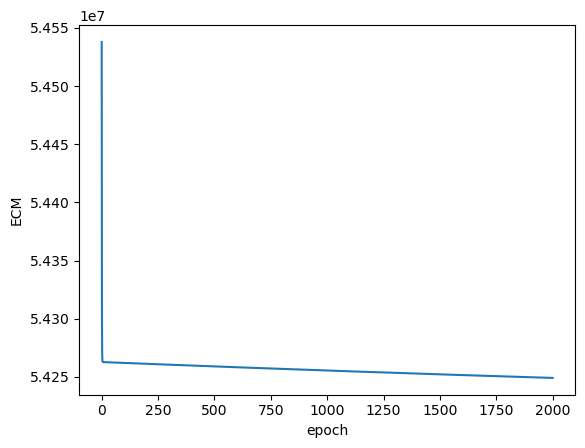

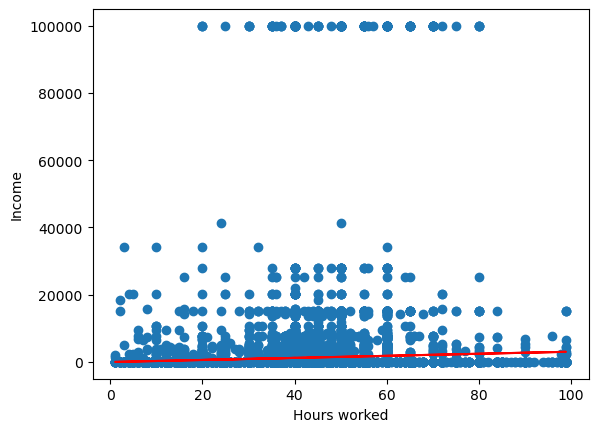

In [12]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#First import the Dataframe
df = pd.read_csv('data/adult.csv')


income = df['capital.gain']
hours_worked = df['hours.per.week']

def calc_model(w, b, x):
    
    return w*x + b

    
def root_mean_square_error(y, y_):
    
    n = y.shape[0]
    error = np.sum((y - y_)**2/n)
    return error

def gradient_descent(w_, b_, alpha, x, y):
    
    n = x.shape[0]
    
    dw = -(2/n)*np.sum(x*(y-(w_*x+b_)))
    db = -(2/n)*np.sum(y-(w_*x+b_))
    
    w = w_ - alpha * dw
    b = b_ - alpha * db
    
    return w, b
    
    
    
x = hours_worked
y = income
    
np.random.seed(2)

w = np.random.randn(1)[0]
b = np.random.randn(1)[0]

alpha = 0.0004
nits = 2000

error = np.zeros((nits, 1))
for i in range(nits):
   
    [w, b] = gradient_descent(w,b,alpha,x,y)

    
    y_ = calc_model(w,b,x)

    
    error[i] = root_mean_square_error(y,y_)

    
    if (i+1)%1000 == 0:
        print("Epoch {}".format(i+1))
        print("    w: {:.1f}".format(w), " b: {:.1f}".format(b))
        print("    error: {}".format(error[i]))
        print("=======================================")
        
plt.plot(range(nits),error)
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.show()

y_regr = calc_model(w,b,x)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('Hours worked')
plt.ylabel('Income')
plt.show()